In [1]:
import sys
import os
sys.path.append(os.path.abspath("Algorithms/"))
sys.path.append(os.path.abspath("models/"))

In [2]:
from FBSNNs import *
from BlackScholesBarenblatt100D import *

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 100  # number of trajectories (batch size)
N = 50  # number of time snapshots
D = 100 # number of dimensions

layers = [D + 1] + 4 * [256] + [1]

Xi = np.array([1.0, 0.5] * int(D / 2))[None, :]
T = 1.0

"Available architectures"
mode = "Naisnet"  # FC and Naisnet are available
activation = "ReLU"  # Sine, ReLU and Tanh are available
model = BlackScholesBarenblatt(Xi, T, M, N, D, 1, layers, mode, activation)

n_iter = 2*10**4
lr = 1e-3

In [4]:
model.load_model("models/BlackScholesBarenblatt100DRelu.pth")

In [4]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 0, Loss: 5.526e+05, Y0: 1.479, Time: 0.80, Learning Rate: 1.000e-03
It: 100, Loss: 9.182e+03, Y0: 75.313, Time: 36.04, Learning Rate: 1.000e-03
It: 200, Loss: 5.052e+03, Y0: 82.453, Time: 36.88, Learning Rate: 1.000e-03
It: 300, Loss: 3.628e+03, Y0: 88.971, Time: 35.71, Learning Rate: 1.000e-03
It: 400, Loss: 2.483e+03, Y0: 84.849, Time: 34.53, Learning Rate: 1.000e-03
It: 500, Loss: 2.139e+03, Y0: 83.396, Time: 32.35, Learning Rate: 1.000e-03
It: 600, Loss: 1.950e+03, Y0: 82.714, Time: 32.85, Learning Rate: 1.000e-03
It: 700, Loss: 1.653e+03, Y0: 81.605, Time: 33.00, Learning Rate: 1.000e-03
It: 800, Loss: 1.524e+03, Y0: 80.516, Time: 32.95, Learning Rate: 1.000e-03
It: 900, Loss: 1.458e+03, Y0: 80.259, Time: 32.90, Learning Rate: 1.000e-03
It: 1000, Loss: 1.350e+03, Y0: 79.769, Time: 33.52, Learning Rate: 1.000e-03
It: 1100, Loss: 1.252e+03, Y0: 79.233, Time: 33.68, Learning Rate: 1.000e-03
It: 1200, Loss: 1.321e+03, Y0: 79.595, Time: 34.37, Learning Rate: 1.000e-03
It: 13

In [5]:
n_iter = 5*10**3
lr = 1e-5

In [6]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 19900, Loss: 1.212e+03, Y0: 78.026, Time: 0.59, Learning Rate: 1.000e-05
It: 20000, Loss: 1.137e+03, Y0: 77.206, Time: 18.31, Learning Rate: 1.000e-05
It: 20100, Loss: 1.168e+03, Y0: 77.415, Time: 18.05, Learning Rate: 1.000e-05
It: 20200, Loss: 1.200e+03, Y0: 77.338, Time: 19.22, Learning Rate: 1.000e-05
It: 20300, Loss: 1.136e+03, Y0: 77.325, Time: 23.42, Learning Rate: 1.000e-05
It: 20400, Loss: 1.156e+03, Y0: 77.335, Time: 23.31, Learning Rate: 1.000e-05
It: 20500, Loss: 1.194e+03, Y0: 77.426, Time: 23.44, Learning Rate: 1.000e-05
It: 20600, Loss: 1.185e+03, Y0: 77.341, Time: 23.17, Learning Rate: 1.000e-05
It: 20700, Loss: 1.155e+03, Y0: 77.335, Time: 23.31, Learning Rate: 1.000e-05
It: 20800, Loss: 1.189e+03, Y0: 77.421, Time: 23.41, Learning Rate: 1.000e-05
It: 20900, Loss: 1.110e+03, Y0: 77.314, Time: 23.03, Learning Rate: 1.000e-05
It: 21000, Loss: 1.163e+03, Y0: 77.296, Time: 23.33, Learning Rate: 1.000e-05
It: 21100, Loss: 1.170e+03, Y0: 77.256, Time: 23.00, Learn

In [5]:
def figsize(scale, nplots = 1):
    fig_width_pt = 438.17227                        
    inches_per_pt = 1.0/72.27                       
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            
    fig_width = fig_width_pt*inches_per_pt*scale    
    fig_height = nplots*fig_width*golden_mean             
    fig_size = [fig_width,fig_height]
    return fig_size

In [6]:
graph = model.iteration, model.training_loss

In [7]:
np.random.seed(42)
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)
samples = 5

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

Y_test = np.reshape(u_exact(T,np.reshape(t_test[0:M, :, :], [-1, 1]), np.reshape(X_pred[0:M, :, :], [-1, D])),
                    [M, -1, 1])

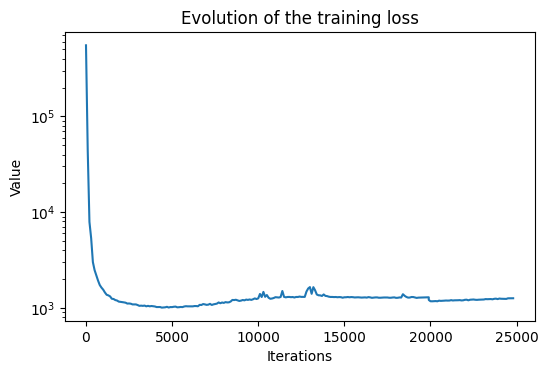

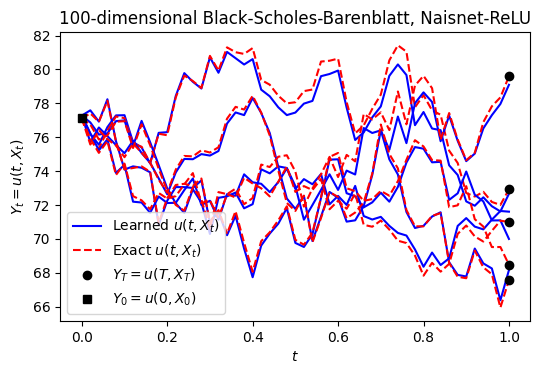

In [8]:
plt.figure(figsize=figsize(1))
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
plt.savefig("Figures/BlackScholesBarenblatt100DReluLoss.pdf")

plt.figure(figsize=figsize(1))
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T, 'b', label='Learned $u(t,X_t)$')
plt.plot(t_test[0:1, :, 0].T, Y_test[0:1, :, 0].T, 'r--', label='Exact $u(t,X_t)$')
plt.plot(t_test[0:1, -1, 0], Y_test[0:1, -1, 0], 'ko', label='$Y_T = u(T,X_T)$')

plt.plot(t_test[1:samples, :, 0].T, Y_pred[1:samples, :, 0].T, 'b')
plt.plot(t_test[1:samples, :, 0].T, Y_test[1:samples, :, 0].T, 'r--')
plt.plot(t_test[1:samples, -1, 0], Y_test[1:samples, -1, 0], 'ko')

plt.plot([0], Y_test[0, 0, 0], 'ks', label='$Y_0 = u(0,X_0)$')

plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()

plt.savefig("Figures/BlackScholesBarenblatt100DReluPreds.pdf")

plt.show()

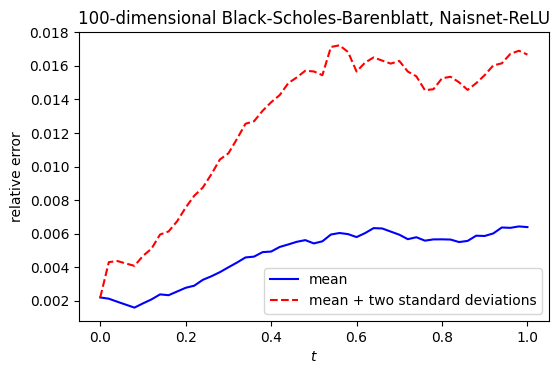

In [9]:
errors = np.sqrt((Y_test - Y_pred) ** 2 / Y_test ** 2)
mean_errors = np.mean(errors, 0)
std_errors = np.std(errors, 0)

plt.figure(figsize=figsize(1))
plt.plot(t_test[0, :, 0], mean_errors, 'b', label='mean')
plt.plot(t_test[0, :, 0], mean_errors + 2 * std_errors, 'r--', label='mean + two standard deviations')
plt.xlabel('$t$')
plt.ylabel('relative error')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()
plt.savefig("Figures/BlackScholesBarenblatt100DReluErrors.pdf")
plt.show()

In [10]:
model.save_model("models/BlackScholesBarenblatt100DRelu.pth")